In [47]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [48]:
results = """{"stereoset_binary_bert_classifieronly": {"250": {"base_acc": 57.18163954744989, "contribs": [-0.002411297056823969, 0.0025292050559073687, 0.001033415668644011, 0.0008854418410919607, -0.0004385380889289081, 0.013723690994083881, -0.00022929931583348662, 0.0010028596734628081, 0.013228369876742363, 0.0027597867883741856, 0.017173035070300102, 0.0012790251057595015, -0.0016299914568662643, 0.0034671160392463207, -0.002053097588941455, 0.0005300981574691832, 0.00225322088226676, 0.0051943399012088776, 0.0037945574149489403, 0.003728001145645976, 0.0032586026936769485, 0.0008230243111029267, 0.000639552075881511, -0.007428666111081839, -0.012448164634406567, 0.004598179832100868, 0.005076263099908829, -0.002638402162119746, 0.007511768024414778, -0.011691982857882977, -0.018592700362205505, 0.002042963868007064, -0.0007917156908661127, -0.009077475406229496, -0.0026434154715389013, 0.0005884616984985769, -0.0016526399413123727, 0.0016652047634124756, 0.010030441917479038, 0.00106003787368536, 0.0022349173668771982, 0.00020422590023372322, 0.014581562951207161, 0.00932706706225872, -0.0022668298333883286, 0.008194545283913612, 0.0005509466282092035, -0.00011037755757570267, 0.00311575410887599, 0.00956643931567669, 0.0016409086529165506, 0.001517463126219809, 0.0011312232818454504, 0.00047424653894267976, 0.00020485259301494807, 0.0024325719568878412, 0.0001651930360822007, 0.004012768156826496, 0.00022744502348359674, 0.0025435639545321465, 0.0038349393289536238, 0.0006307382136583328, 0.003349299542605877, -0.002211851067841053, -0.005607241299003363, 0.0025085280649363995, 0.003207606263458729, 0.0030057404655963182, 5.724782022298314e-05, 0.00013948054402135313, 0.0039681862108409405, -0.005980777088552713, 0.0017013192409649491, -0.0005857679061591625, 0.002713090041652322, 0.0023794700391590595, 0.003640885232016444, 0.0041240518912673, 0.004572685807943344, 0.0007864958606660366, 0.022653428837656975, -0.0006289849989116192, -0.0010259016416966915, -0.00028252365882508457, 0.00030153096304275095, 0.004650670103728771, 0.0001478263147873804, -0.0017146369209513068, 0.0006611627759411931, 0.005800454877316952, 0.0003278952499385923, -7.230020128190517e-05, 0.0007692780927754939, -0.0007819519960321486, 0.0037910970859229565, -0.0028492689598351717, -0.0013336878037080169, -0.006467076484113932, 0.004960406571626663, -0.00016383302863687277, 0.002616885583847761, 0.0027565776836127043, -0.00035666950861923397, 0.0029899990186095238, -0.0010378946317359805, 0.010715886019170284, 0.009790127165615559, 0.0077171968296170235, 0.00019362593593541533, 0.0017311524134129286, -0.0012552374973893166, 0.002064366824924946, 0.0026604735758155584, 0.017904968932271004, -0.001055592903867364, -0.0002256940642837435, 0.015170617960393429, 0.000844173482619226, 0.007012773770838976, -0.014488618820905685, 0.009265649132430553, 0.0009949109517037868, 0.001036409055814147, -0.008812598884105682, 0.00356672122143209, 0.00018700517830438912, 0.0043526263907551765, -0.007430408615618944, 0.01131847221404314, -0.0020706490613520145, 0.008016693405807018, 0.008134092204272747, -0.011925690807402134, 0.003509348025545478, 0.009333948604762554, -0.014128832146525383, 0.0020743978675454855, 0.005838385783135891, 0.0227340180426836, -0.0034481699112802744, 0.012364980764687061, 0.04004516452550888, 0.008256022818386555, -0.008837179280817509], "bottom_up_results": [14.122807254992589, 36.94730728530408, 36.5368238391894, 35.76402209021864, 33.91617561420614, 36.23194547258986, 36.873292385279036, 35.29369062492792, 33.111739080020655, 34.450215800574206, 38.41582851187634, 36.992054061123646, 38.833577853957934, 38.450164898967856, 38.094560821844794, 38.21912849595416, 38.98321513760518, 39.89358529766909, 41.16895227429313, 41.59487486885599, 41.64161861404808, 41.242380728953904, 40.84521395402562, 41.44289249712172, 42.055592615798936, 40.81174708030696, 40.210590593905266, 39.95038130095919, 39.58217222668429, 38.6859905352167, 38.578352942095016, 40.525280140863536, 40.39323124822973, 41.46435827449741, 40.82585139323839, 41.89799649191789, 42.00474688367554, 41.825087894784055, 42.46057313851163, 42.78993153183702, 42.29022700554238, 42.29367983371576, 41.46427527122521, 41.32732122063294, 43.41151513975566, 41.71793177373737, 42.556407062452735, 41.64212628042861, 41.54010728253375, 41.66750080014987, 41.08488036275408, 40.81348428078116, 41.39984088439292, 41.67483884554678, 41.78560511179553, 41.82824685280757, 41.8758798377619, 42.316466703765805, 42.36646814219431, 42.06341761779345, 42.148007555525425, 41.72806507338302, 41.91570982431891, 41.24231646830382, 41.502658759340655, 41.00209187616862, 41.47472051506437, 41.44030652386295, 40.56114191202129, 40.5388646070952, 42.2746080990094, 42.006722019877046, 43.56384778758841, 44.33835406660071, 45.055165553416536, 49.05625864327241, 48.95539980891222, 50.13678942348295, 50.52153175676163, 50.59945356429862, 51.147264031534334, 51.67809633210406, 51.7854054514589, 52.48201470369225, 52.526042490605946, 52.33641919335924, 52.64710702656859, 52.706539046737575, 53.154554769960626, 52.962081554832146, 52.644296962037345, 52.945018299642136, 53.42151180842861, 52.738646442941494, 52.32929834215002, 52.990992110594206, 52.56788004365114, 52.91644433872421, 52.61562450676602, 52.64671466009466, 52.520089689480194, 52.680510357968586, 52.96268344850118, 52.79333977411673, 52.694965555517825, 52.45624864897028, 52.488840828532155, 52.30587974744938, 52.48212613323239, 52.02268387088676, 52.39137307437161, 52.61328266969894, 52.15838749913516, 52.19604355880553, 51.98658984221307, 52.33960651692333, 52.27052454862845, 52.00186192754924, 53.00733034525458, 53.36049013885453, 54.09695653551297, 53.95871354300827, 54.25189847305412, 54.21726016153323, 54.52568689815726, 54.71132157875116, 54.41370860372589, 54.43405050028045, 54.04103897782833, 54.18878041517395, 54.16613566067585, 54.79591576475902, 55.30570058940112, 54.43288051295817, 55.331161298406144, 55.46996751445008, 55.79940169490075, 56.0530338627552, 56.00394800026907, 56.23603830261323, 56.28121174103623, 57.052936011950884, 57.11634386820171, 57.49137599452602, 57.18163954744989], "top_down_results": [57.18163954744989, 56.58393826048768, 56.94199883066159, 56.74657096244679, 56.83976814078076, 56.75663137519091, 56.74878509298183, 56.54508066252051, 56.3313059354117, 56.10315467625581, 56.430717408881854, 56.624716889008276, 56.916088901899286, 56.807018388856704, 57.050798308760584, 57.05811659520725, 57.095484372912715, 55.91282716950109, 55.41114773094414, 55.58079205270543, 54.68990082133041, 54.913411217493966, 54.54976182203032, 54.98800335251892, 55.31523851934381, 54.722426639757586, 54.615634685540236, 54.81094133892265, 55.39189528805643, 55.00155116261252, 53.75781685886076, 54.24034349154751, 54.12519714794057, 54.17708591678629, 54.059178309769834, 54.4005642571523, 53.9279317840411, 53.834790296755926, 53.90417516010988, 53.756910565935826, 53.246786767946475, 54.125066247491766, 53.61998267080261, 53.92765343416957, 54.245770476832575, 54.28947576961911, 54.534053249465025, 54.147805785303994, 54.24843868687605, 54.59966608879974, 54.61058842465443, 54.72798848702822, 54.74370522188437, 54.24080943428373, 54.34573190173277, 54.836980649814016, 54.55694956816792, 54.2383427930489, 53.48211134714117, 53.69311027204162, 53.206723245779045, 53.30380942099704, 53.370005985151344, 54.085946440738944, 53.51130322382824, 53.689998383979884, 53.47749921888955, 53.45605397483409, 53.755589551146954, 53.26869285096765, 53.05346970522336, 53.186576672006275, 53.25470229154717, 53.253986652238424, 51.696872863173034, 51.18763829296354, 50.92738487358817, 51.166148917212446, 50.42587596611452, 50.39941939731836, 50.927892222231684, 51.97603213311641, 52.17433445710691, 51.919954296987605, 51.5387641290231, 51.183427067648694, 51.1588874843096, 51.148456702199226, 51.33071666552334, 51.21624140264861, 50.89986917468685, 50.89670108215725, 50.2663738888141, 51.31185475904399, 51.35649219538859, 51.95787297362612, 51.21996855368399, 51.08309545853157, 50.51008412490686, 51.10473857735598, 50.17069886392738, 49.77321190356465, 50.33967636943916, 50.57921142212776, 50.915682532764556, 49.95670400746792, 50.49425881281615, 50.593696740523484, 50.81105965291965, 49.909007041161765, 49.14152337578844, 49.082462284884656, 49.87238003439855, 49.445856487621846, 49.978938676299165, 50.341534051306056, 50.25757783838798, 50.259834089662135, 49.01537376059332, 49.47509256925792, 49.22720379350445, 48.659867275033754, 48.36923331178154, 48.125590604029924, 46.554024284424294, 46.919818197577435, 46.05330898119987, 44.027000680388554, 44.422452311805614, 43.11376765229515, 43.19469758910635, 44.744075652430986, 44.45091198689124, 44.5758481474225, 42.49851821330343, 41.9268477991997, 41.918613028267366, 37.56729871802634, 39.893523709294364, 36.387818620037145, 36.06014699498776, 35.40232690780111, 30.427990334009557, 36.03955598911071, 14.122807254992589], "bottom_up_rev_results": [14.122807254992589, 36.03955598911071, 30.427990334009557, 35.40232690780111, 36.06014699498776, 36.387818620037145, 39.893523709294364, 37.56729871802634, 41.918613028267366, 41.9268477991997, 42.49851821330343, 44.5758481474225, 44.45091198689124, 44.744075652430986, 43.19469758910635, 43.11376765229515, 44.422452311805614, 44.027000680388554, 46.05330898119987, 46.919818197577435, 46.554024284424294, 48.125590604029924, 48.36923331178154, 48.659867275033754, 49.22720379350445, 49.47509256925792, 49.01537376059332, 50.259834089662135, 50.25757783838798, 50.341534051306056, 49.978938676299165, 49.445856487621846, 49.87238003439855, 49.082462284884656, 49.14152337578844, 49.909007041161765, 50.81105965291965, 50.593696740523484, 50.49425881281615, 49.95670400746792, 50.915682532764556, 50.57921142212776, 50.33967636943916, 49.77321190356465, 50.17069886392738, 51.10473857735598, 50.51008412490686, 51.08309545853157, 51.21996855368399, 51.95787297362612, 51.35649219538859, 51.31185475904399, 50.2663738888141, 50.89670108215725, 50.89986917468685, 51.21624140264861, 51.33071666552334, 51.148456702199226, 51.1588874843096, 51.183427067648694, 51.5387641290231, 51.919954296987605, 52.17433445710691, 51.97603213311641, 50.927892222231684, 50.39941939731836, 50.42587596611452, 51.166148917212446, 50.92738487358817, 51.18763829296354, 51.696872863173034, 53.253986652238424, 53.25470229154717, 53.186576672006275, 53.05346970522336, 53.26869285096765, 53.755589551146954, 53.45605397483409, 53.47749921888955, 53.689998383979884, 53.51130322382824, 54.085946440738944, 53.370005985151344, 53.30380942099704, 53.206723245779045, 53.69311027204162, 53.48211134714117, 54.2383427930489, 54.55694956816792, 54.836980649814016, 54.34573190173277, 54.24080943428373, 54.74370522188437, 54.72798848702822, 54.61058842465443, 54.59966608879974, 54.24843868687605, 54.147805785303994, 54.534053249465025, 54.28947576961911, 54.245770476832575, 53.92765343416957, 53.61998267080261, 54.125066247491766, 53.246786767946475, 53.756910565935826, 53.90417516010988, 53.834790296755926, 53.9279317840411, 54.4005642571523, 54.059178309769834, 54.17708591678629, 54.12519714794057, 54.24034349154751, 53.75781685886076, 55.00155116261252, 55.39189528805643, 54.81094133892265, 54.615634685540236, 54.722426639757586, 55.31523851934381, 54.98800335251892, 54.54976182203032, 54.913411217493966, 54.68990082133041, 55.58079205270543, 55.41114773094414, 55.91282716950109, 57.095484372912715, 57.05811659520725, 57.050798308760584, 56.807018388856704, 56.916088901899286, 56.624716889008276, 56.430717408881854, 56.10315467625581, 56.3313059354117, 56.54508066252051, 56.74878509298183, 56.75663137519091, 56.83976814078076, 56.74657096244679, 56.94199883066159, 56.58393826048768, 57.18163954744989], "top_down_rev_results": [57.18163954744989, 57.49137599452602, 57.11634386820171, 57.052936011950884, 56.28121174103623, 56.23603830261323, 56.00394800026907, 56.0530338627552, 55.79940169490075, 55.46996751445008, 55.331161298406144, 54.43288051295817, 55.30570058940112, 54.79591576475902, 54.16613566067585, 54.18878041517395, 54.04103897782833, 54.43405050028045, 54.41370860372589, 54.71132157875116, 54.52568689815726, 54.21726016153323, 54.25189847305412, 53.95871354300827, 54.09695653551297, 53.36049013885453, 53.00733034525458, 52.00186192754924, 52.27052454862845, 52.33960651692333, 51.98658984221307, 52.19604355880553, 52.15838749913516, 52.61328266969894, 52.39137307437161, 52.02268387088676, 52.48212613323239, 52.30587974744938, 52.488840828532155, 52.45624864897028, 52.694965555517825, 52.79333977411673, 52.96268344850118, 52.680510357968586, 52.520089689480194, 52.64671466009466, 52.61562450676602, 52.91644433872421, 52.56788004365114, 52.990992110594206, 52.32929834215002, 52.738646442941494, 53.42151180842861, 52.945018299642136, 52.644296962037345, 52.962081554832146, 53.154554769960626, 52.706539046737575, 52.64710702656859, 52.33641919335924, 52.526042490605946, 52.48201470369225, 51.7854054514589, 51.67809633210406, 51.147264031534334, 50.59945356429862, 50.52153175676163, 50.13678942348295, 48.95539980891222, 49.05625864327241, 45.055165553416536, 44.33835406660071, 43.56384778758841, 42.006722019877046, 42.2746080990094, 40.5388646070952, 40.56114191202129, 41.44030652386295, 41.47472051506437, 41.00209187616862, 41.502658759340655, 41.24231646830382, 41.91570982431891, 41.72806507338302, 42.148007555525425, 42.06341761779345, 42.36646814219431, 42.316466703765805, 41.8758798377619, 41.82824685280757, 41.78560511179553, 41.67483884554678, 41.39984088439292, 40.81348428078116, 41.08488036275408, 41.66750080014987, 41.54010728253375, 41.64212628042861, 42.556407062452735, 41.71793177373737, 43.41151513975566, 41.32732122063294, 41.46427527122521, 42.29367983371576, 42.29022700554238, 42.78993153183702, 42.46057313851163, 41.825087894784055, 42.00474688367554, 41.89799649191789, 40.82585139323839, 41.46435827449741, 40.39323124822973, 40.525280140863536, 38.578352942095016, 38.6859905352167, 39.58217222668429, 39.95038130095919, 40.210590593905266, 40.81174708030696, 42.055592615798936, 41.44289249712172, 40.84521395402562, 41.242380728953904, 41.64161861404808, 41.59487486885599, 41.16895227429313, 39.89358529766909, 38.98321513760518, 38.21912849595416, 38.094560821844794, 38.450164898967856, 38.833577853957934, 36.992054061123646, 38.41582851187634, 34.450215800574206, 33.111739080020655, 35.29369062492792, 36.873292385279036, 36.23194547258986, 33.91617561420614, 35.76402209021864, 36.5368238391894, 36.94730728530408, 14.122807254992589]}}}"""

In [49]:
data = json.loads(results)

In [50]:
data.keys()

dict_keys(['stereoset_binary_bert_classifieronly'])

In [51]:
checkpoints = list(data.keys())
suffix = "250"
suffixes = [suffix]

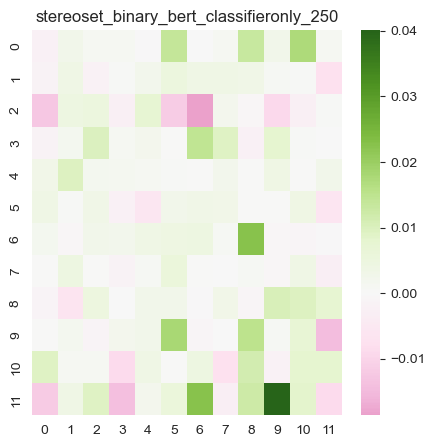

In [52]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    ax = fig.add_subplot(1, len(checkpoints),i+1)
    ax.set_title(f"{checkpoint}_{suffix}")
    sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

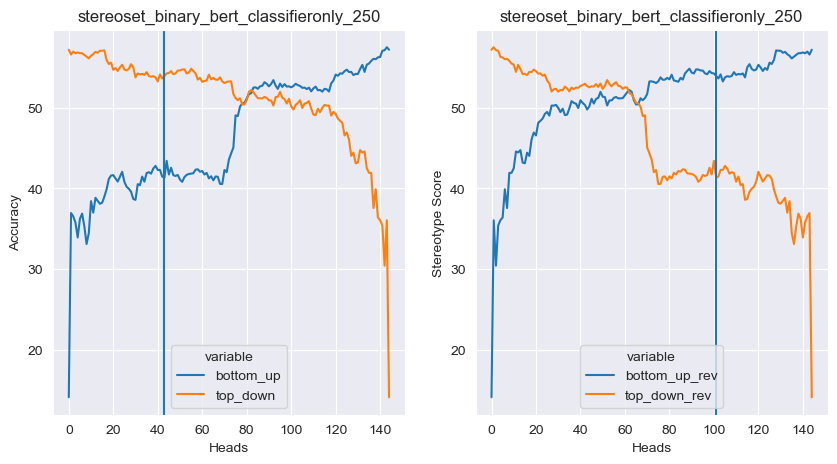

In [53]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(1, 2, 1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up': data[checkpoint][suffix]["bottom_up_results"],
            'top_down': data[checkpoint][suffix]["top_down_results"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Accuracy")
        ax.axvline(vline, 0, 1)

        ax = fig.add_subplot(1,2, 2)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up_rev': data[checkpoint][suffix]["bottom_up_rev_results"],
            'top_down_rev': data[checkpoint][suffix]["top_down_rev_results"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs > 0).sum()
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        ax.set(xlabel="Heads", ylabel="Stereotype Score")
        ax.axvline(vline, 0, 1)

plt.show()